## Step 1: Reading and Understanding the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
bike = pd.read_csv("day.csv")
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking for the null values in column data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# renaming few columns for better readibility
bike.rename(columns={'yr': 'year','mnth':'month','hum':'humidity'}, inplace=True)

In [9]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Encoding/mapping the season column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})




In [13]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Handling outliers

In [15]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
bike.nunique() #gives info about unique values present in data

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

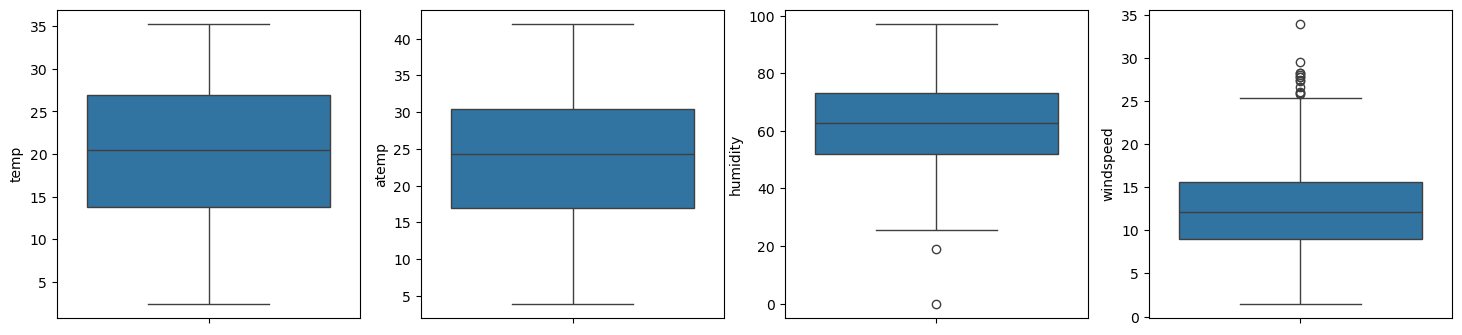

In [17]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

So from the above plots it is clear that we don't have any outliers

## Step 2: Visualising the Data

### Analyzing/visualizing the categorical columns

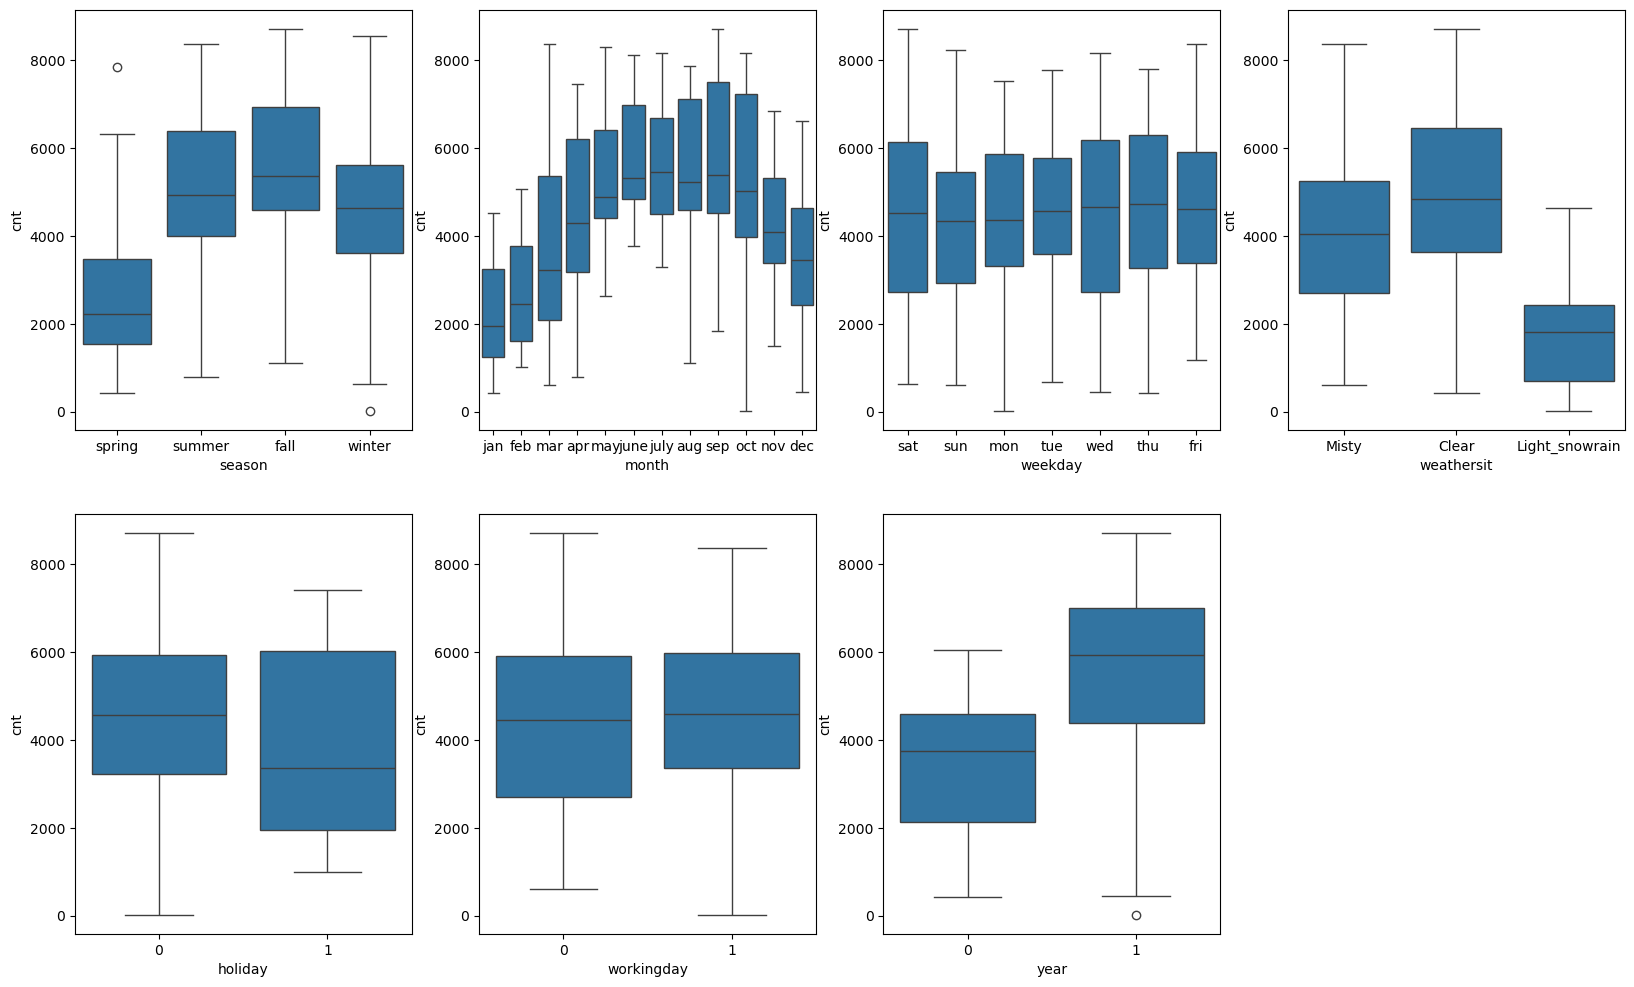

In [21]:
# to see how predictor variables stand against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2, 4, 2)
sns.boxplot(x='month', y='cnt', data=bike)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(2, 4, 7)
sns.boxplot(x='year', y='cnt', data=bike)
plt.show()


In [22]:
# Function to create barplot related to categorical columns
def plot_cat_columns(column):
    sns.barplot(x=column, y='cnt', data=bike, hue='year', palette='Set1')
    plt.legend(title='Year', labels=['2018 (Red)', '2019 (Blue)'])  
    plt.show()


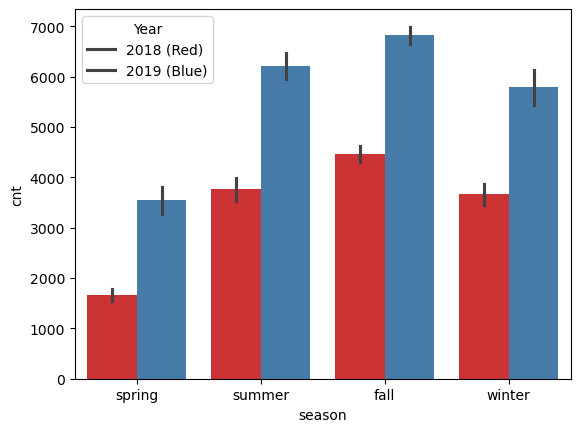

In [23]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

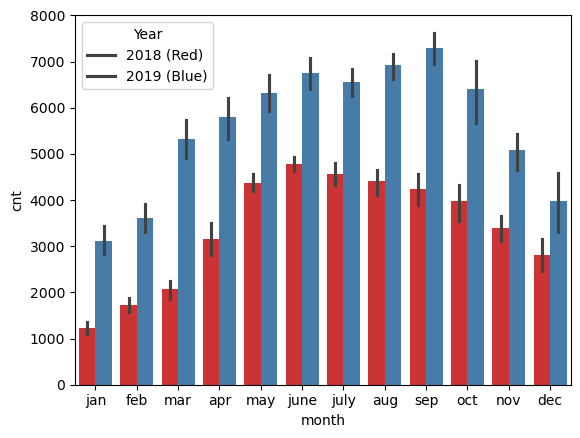

In [25]:
# plotting visualization for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

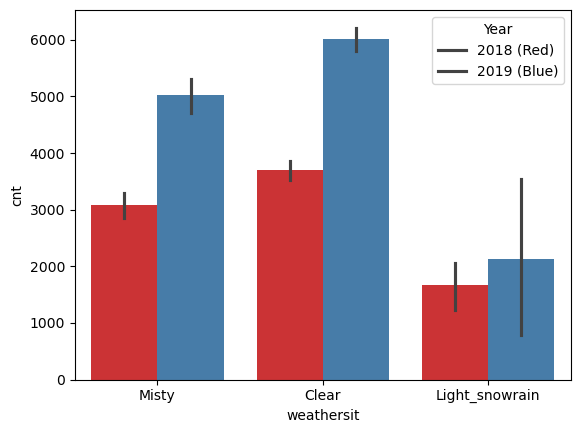

In [27]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

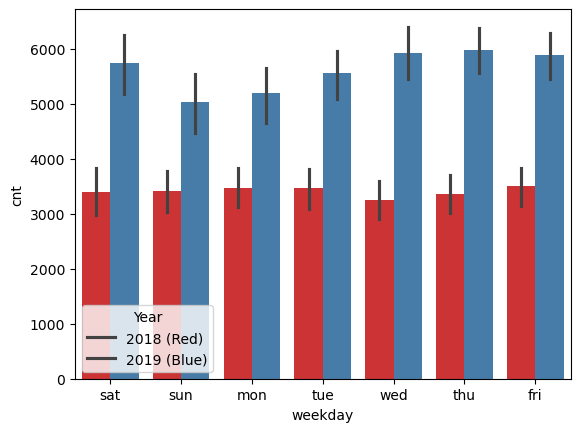

In [29]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fir, Sat and wed have more number of bookings as compared to the start of the week.

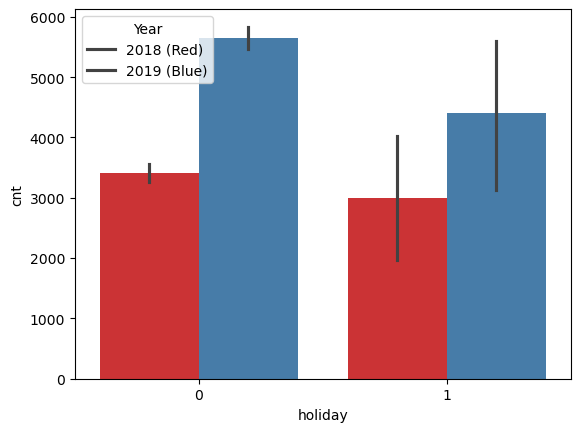

In [31]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its not holiday booking seems to be more and when its holiday people may want to spend time at home and enjoy with family.

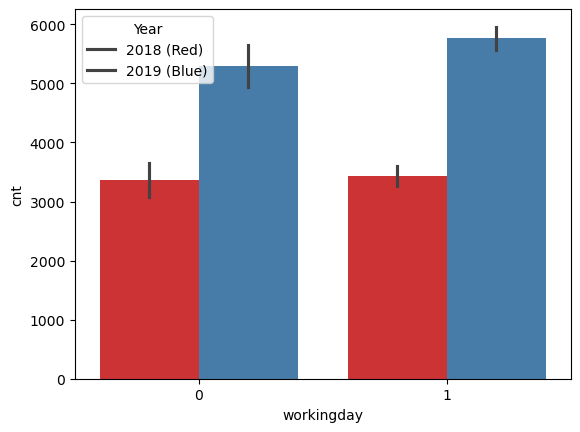

In [33]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.`

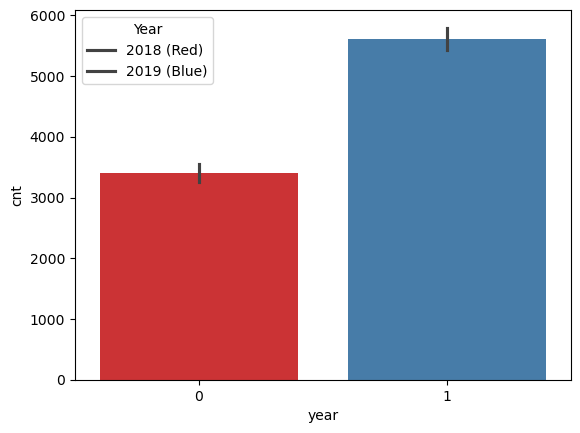

In [35]:
# plotting visualization for year column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

### Analysing/visualizing the numerical columns


<Figure size 1500x3000 with 0 Axes>

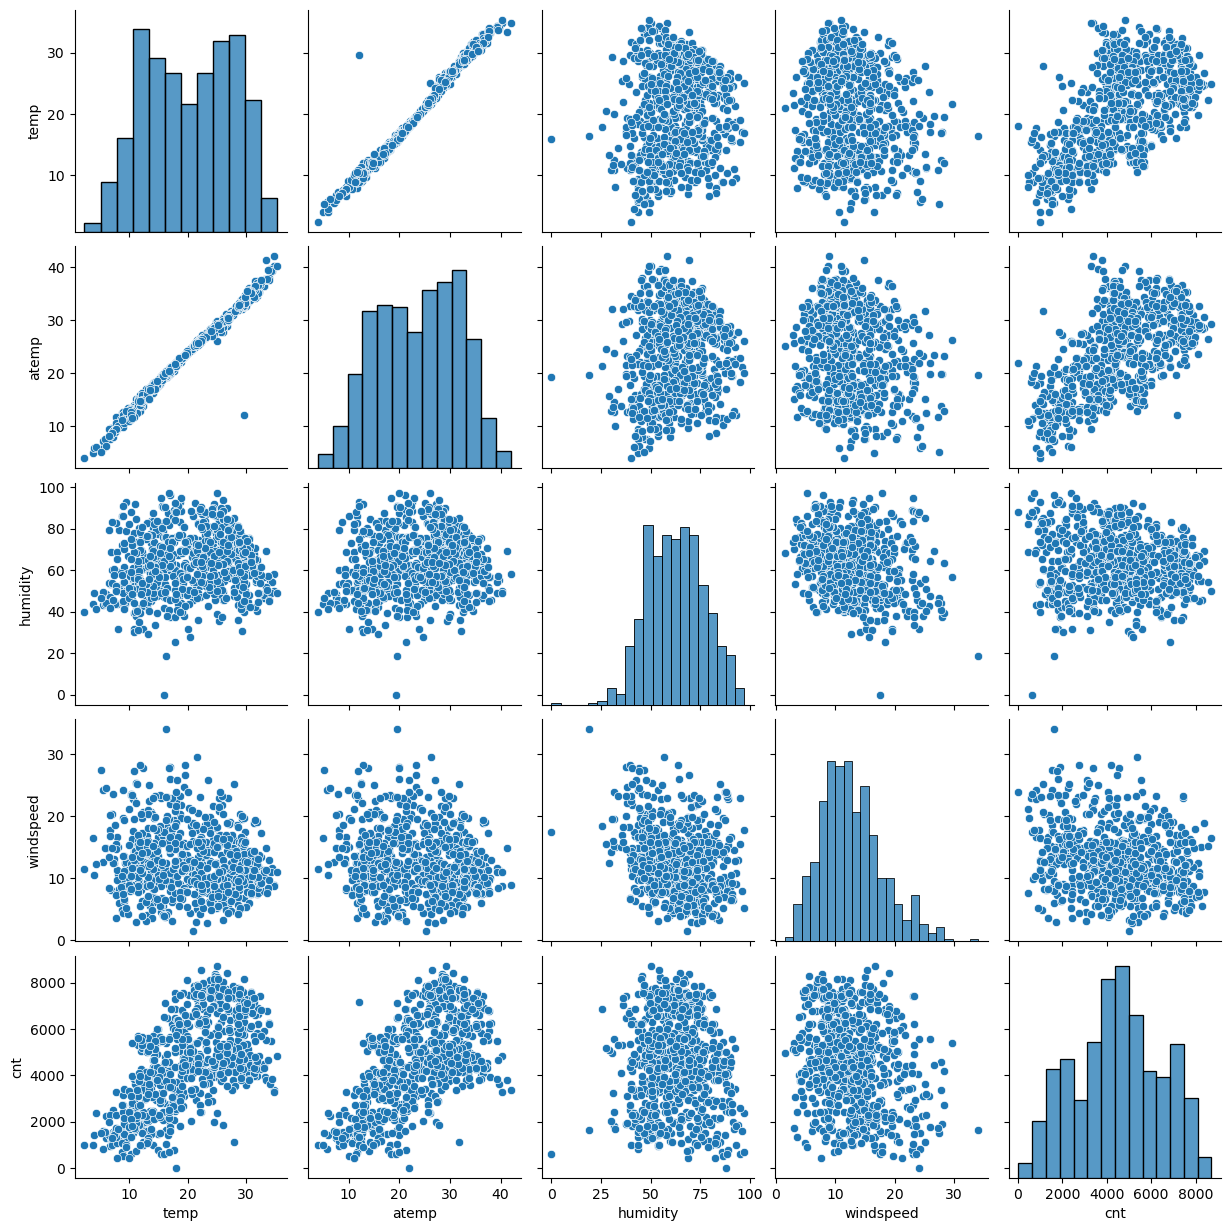

In [38]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between temp and ateam

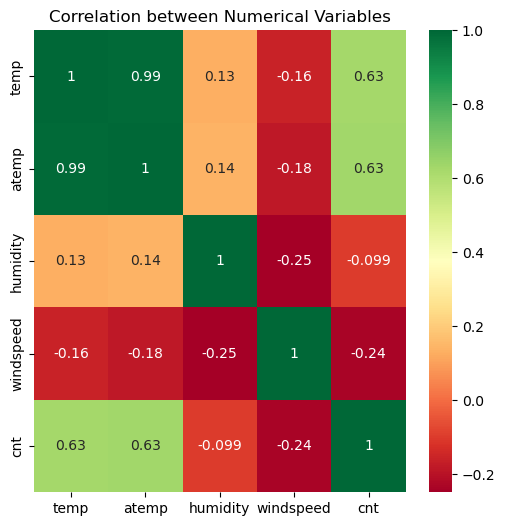

In [40]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Data Preparation

In [43]:
# Dummy variable creation for month, weekday, weathersit, and season variables

bike = pd.get_dummies(data=bike,columns=["season","month","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])

bike.columns


Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [44]:
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,True,True,False,False


In [45]:
bike.shape

(730, 31)

In [46]:
# Convert all boolean columns to integers
bike= bike.astype(int)

# Ensure all columns are now numeric
print(bike.dtypes)


year                         int32
holiday                      int32
workingday                   int32
temp                         int32
atemp                        int32
humidity                     int32
windspeed                    int32
cnt                          int32
season_spring                int32
season_summer                int32
season_winter                int32
month_aug                    int32
month_dec                    int32
month_feb                    int32
month_jan                    int32
month_july                   int32
month_june                   int32
month_mar                    int32
month_may                    int32
month_nov                    int32
month_oct                    int32
month_sep                    int32
weekday_mon                  int32
weekday_sat                  int32
weekday_sun                  int32
weekday_thu                  int32
weekday_tue                  int32
weekday_wed                  int32
weathersit_Clear    

In [47]:
# check the column info of new dataframe 

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       730 non-null    int32
 1   holiday                    730 non-null    int32
 2   workingday                 730 non-null    int32
 3   temp                       730 non-null    int32
 4   atemp                      730 non-null    int32
 5   humidity                   730 non-null    int32
 6   windspeed                  730 non-null    int32
 7   cnt                        730 non-null    int32
 8   season_spring              730 non-null    int32
 9   season_summer              730 non-null    int32
 10  season_winter              730 non-null    int32
 11  month_aug                  730 non-null    int32
 12  month_dec                  730 non-null    int32
 13  month_feb                  730 non-null    int32
 14  month_jan                 

## Step 4: Splitting the Data into Training and Testing Sets

In [49]:
bike.shape

(730, 31)

In [50]:
# splitting the dataframe into Train and Test
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [51]:
# check the shape of training datatset

df_train.shape

(510, 31)

In [52]:
# check the shape of testing datatset

df_test.shape

(220, 31)

In [53]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,29,33,70,11,7216,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,16,20,62,10,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10,11,48,23,1796,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15,18,48,8,4220,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13,16,72,14,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [54]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [55]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.242424,0.205128,0.494845,0.65625,0.204096,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.333333,0.333333,0.742268,0.37500,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [57]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533571,0.512217,0.645826,0.322917,0.513499,0.243137,0.247059,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225145,0.207737,0.145867,0.165495,0.224421,0.429398,0.431725,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.538462,0.649485,0.312500,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


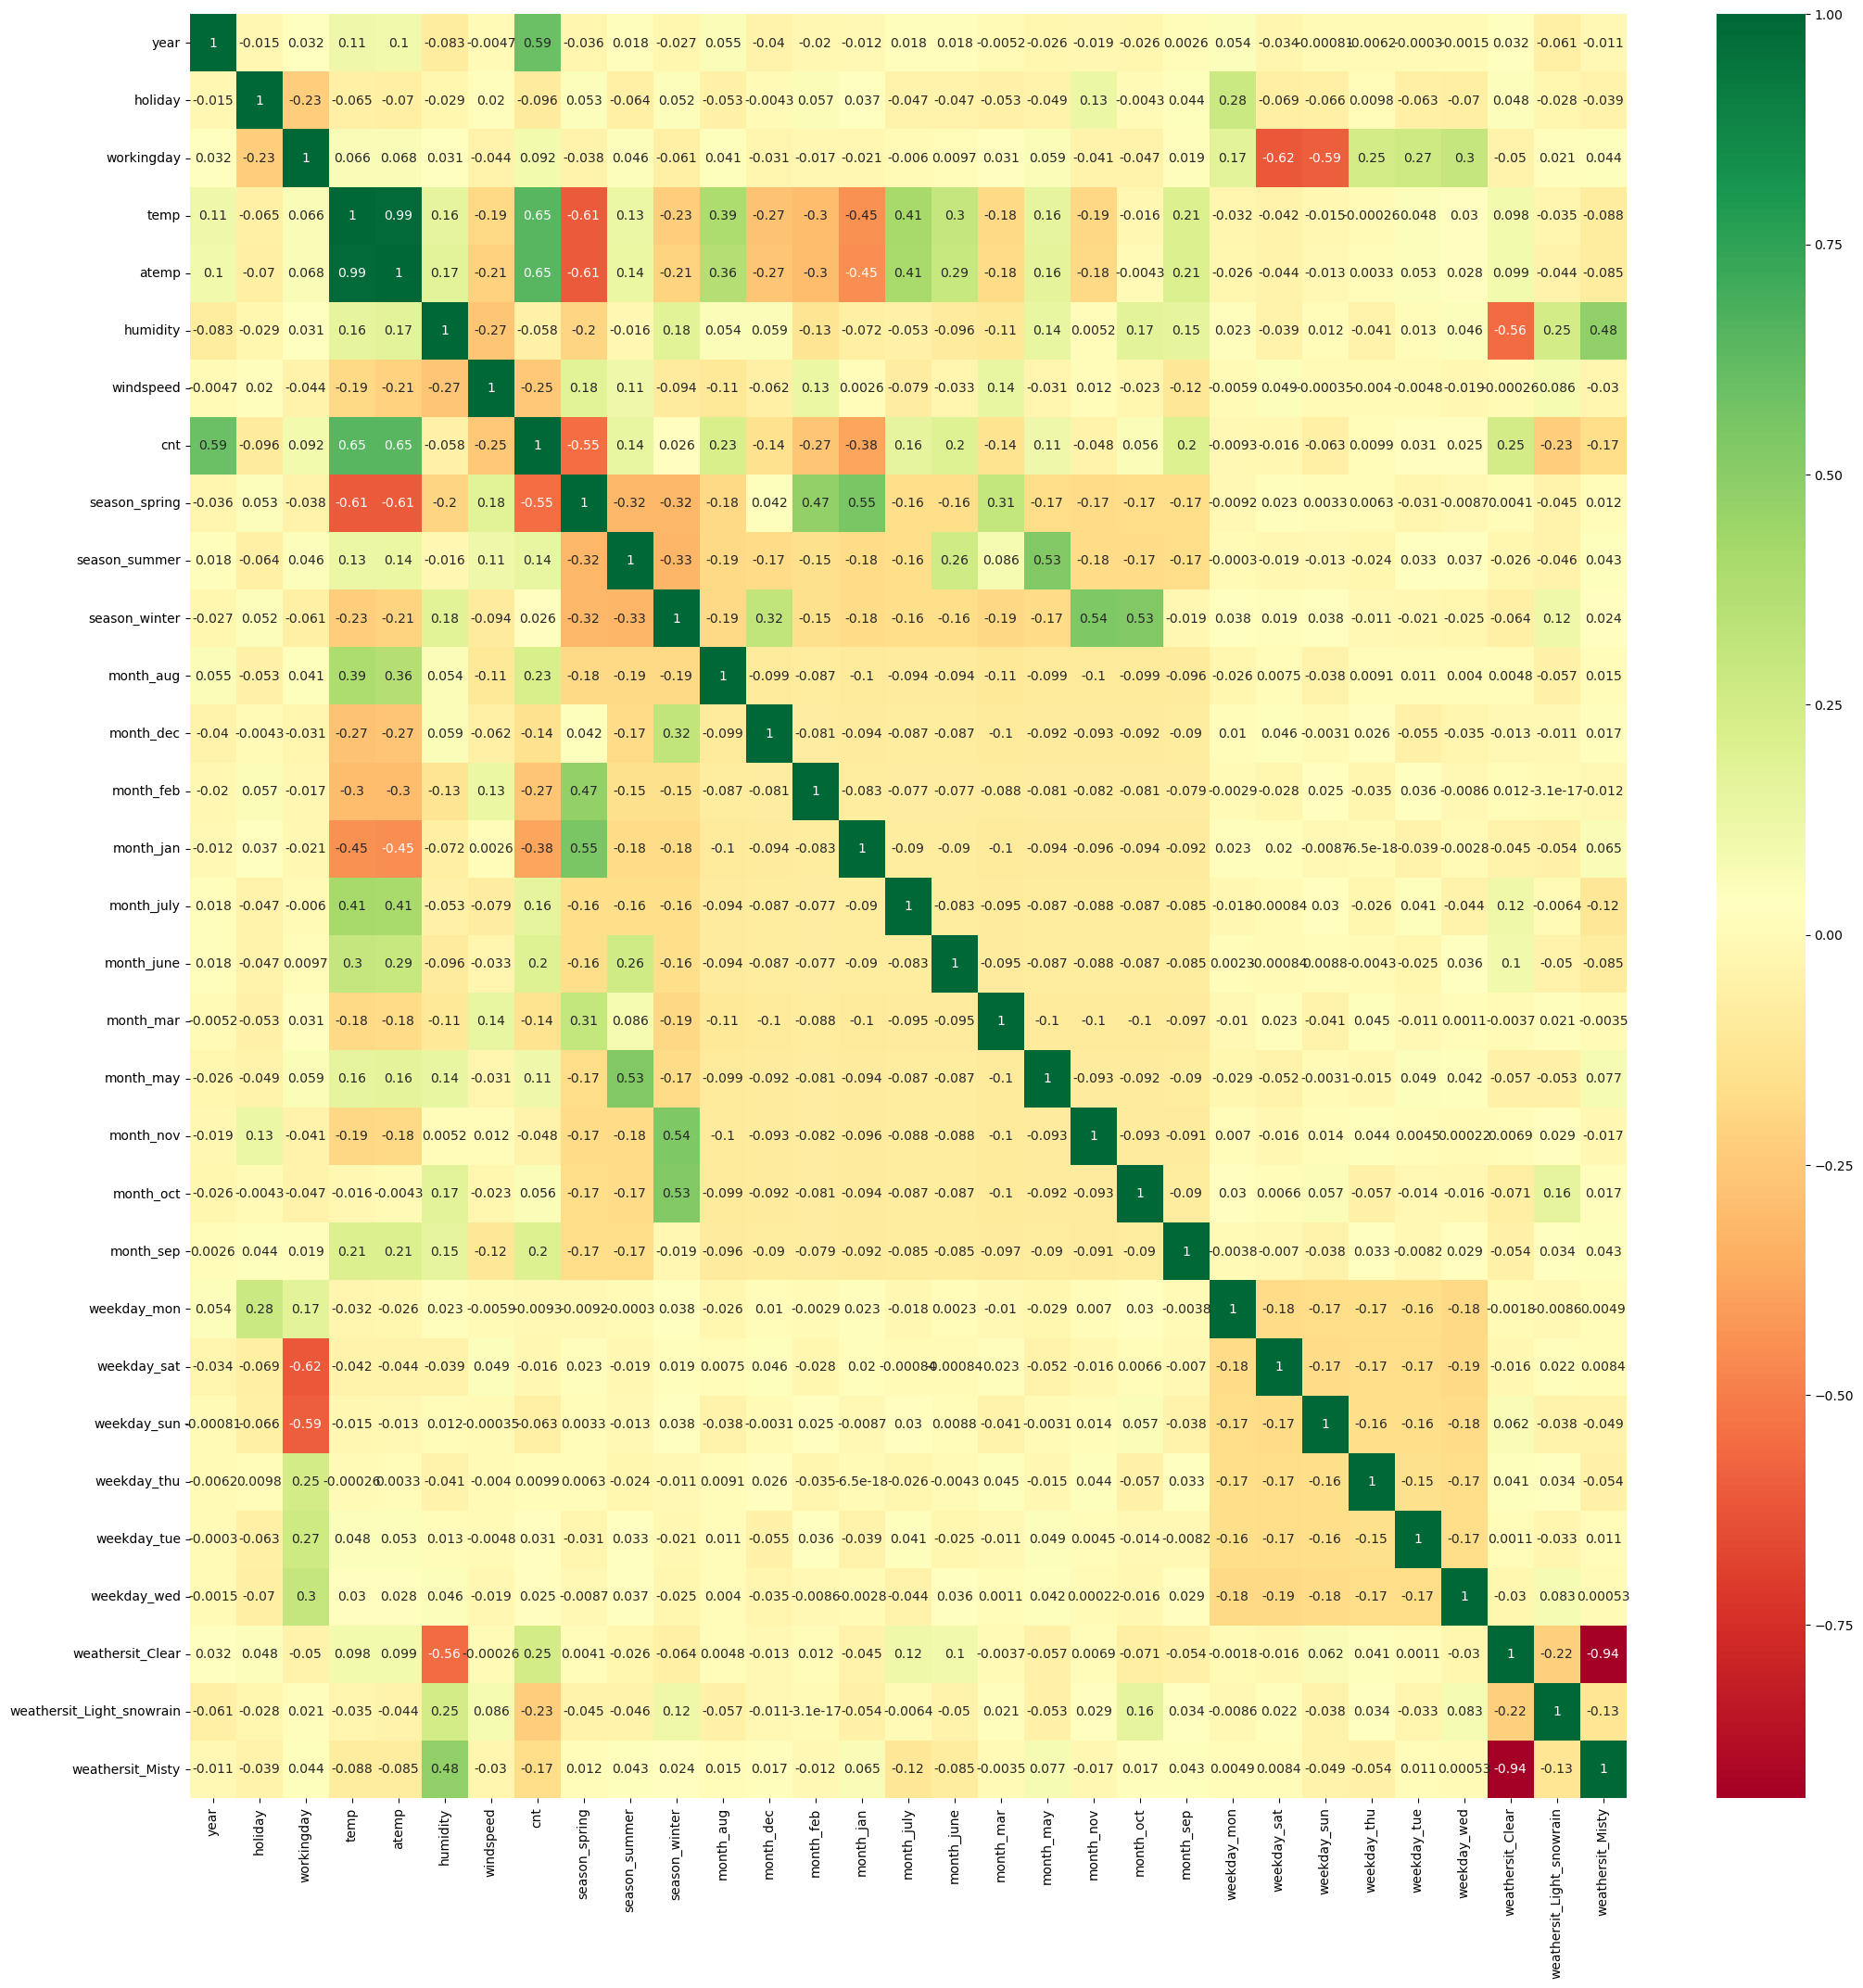

In [58]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

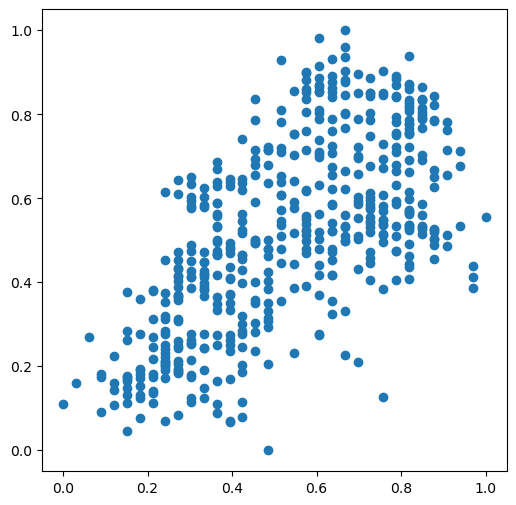

In [60]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [62]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train



In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [65]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', False, 2),
 ('month_aug', False, 9),
 ('month_dec', False, 5),
 ('month_feb', False, 6),
 ('month_jan', False, 3),
 ('month_july', True, 1),
 ('month_june', False, 12),
 ('month_mar', False, 13),
 ('month_may', False, 7),
 ('month_nov', False, 4),
 ('month_oct', False, 14),
 ('month_sep', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 15),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [66]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col


Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_spring', 'month_july', 'month_sep', 'weekday_sat',
       'weekday_sun', 'weathersit_Clear', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [67]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'weekday_mon', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [68]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]


In [69]:
X_train_rfe.shape

(510, 15)

## Step 5: Building a linear model

### Model-1


In [72]:
#Selected columns for Model 1 - all columns selected by RFE
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.61e-186
Time:                        11:23:57   Log-Likelihood:                 501.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     496   BIC:                            -915.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

 holiday is insignificant in presence of other variables; can be dropped

In [74]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)
X_train_new.columns

Index(['year', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'month_july', 'month_sep', 'weekday_sat',
       'weekday_sun', 'weathersit_Clear', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [75]:
X_train_new.shape

(510, 14)

In [76]:
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.61e-186
Time:                        11:23:57   Log-Likelihood:                 501.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     496   BIC:                            -915.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [77]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)
X_train_new.columns

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'month_july', 'month_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Clear', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [78]:
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.16e-186
Time:                        11:23:57   Log-Likelihood:                 500.13
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     497   BIC:                            -919.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [79]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_Clear,56.98
12,weathersit_Misty,38.46
1,workingday,9.03
8,weekday_sat,6.04
9,weekday_sun,5.72
11,weathersit_Light_snowrain,4.78
2,temp,2.09
3,humidity,1.83
5,season_spring,1.65
6,month_july,1.29


In [80]:
X_train_new = X_train_new.drop(["weathersit_Clear"], axis = 1)
X_train_new.columns


Index(['year', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'month_july', 'month_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [81]:
X_train_new.shape

(510, 12)

In [82]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,23.96
1,workingday,16.39
2,temp,12.95
4,windspeed,4.69
8,weekday_sat,4.42
9,weekday_sun,4.33
11,weathersit_Misty,2.18
0,year,2.06
5,season_spring,1.97
6,month_july,1.40


In [144]:
X_train_new = X_train_new.drop(["humidity"], axis = 1)


In [146]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.76
1,workingday,10.43
3,windspeed,4.66
7,weekday_sat,3.11
8,weekday_sun,2.88
0,year,2.06
4,season_spring,1.92
10,weathersit_Misty,1.58
5,month_july,1.36
6,month_sep,1.20


In [148]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)


In [150]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.80
2,windspeed,4.00
0,year,2.03
3,season_spring,1.54
9,weathersit_Misty,1.49
4,month_july,1.32
6,weekday_sat,1.21
5,month_sep,1.20
7,weekday_sun,1.19
8,weathersit_Light_snowrain,1.06


In [152]:
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          8.52e-184
Time:                        11:32:24   Log-Likelihood:                 488.32
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     499   BIC:                            -908.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Residual Analysis of the train data


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [167]:
y_train_pred = lm.predict(X_train_sm)


C:\Users\shail\AppData\Local\Temp\ipykernel_33420\1053768909.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


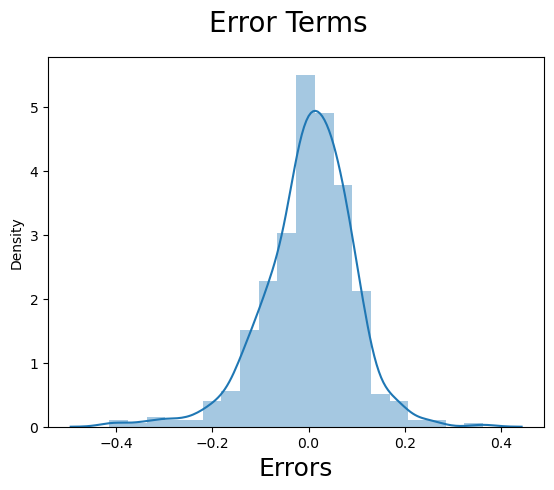

In [173]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                       
plt.show()

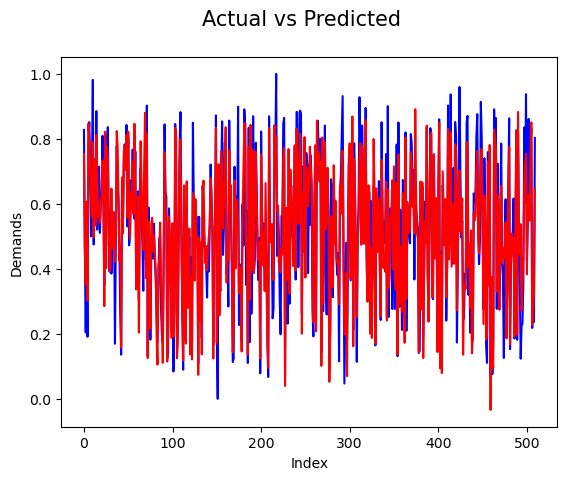

In [175]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Model Predictions

## R-Squared value for train predictions

In [180]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8283701284735809

#### Prediction of values on test dataset


In [192]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test


In [195]:
y_test = df_test.pop('cnt')
X_test = df_test

In [197]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [209]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [211]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8026536269657796

# Model Evaluation


Text(0, 0.5, 'y_pred')

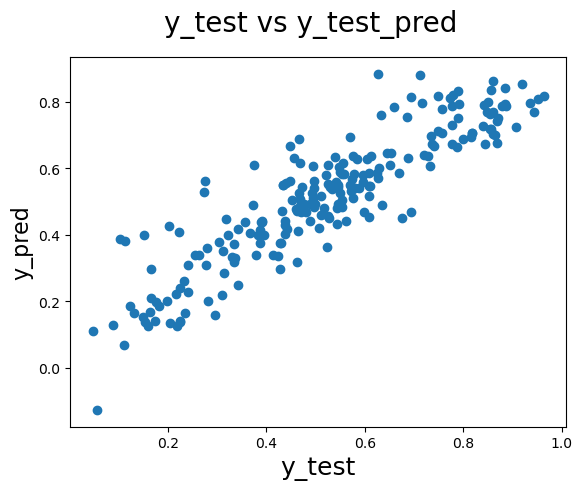

In [216]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)   

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.828
    - Test dataset R^2           : 0.802

In [229]:
import numpy as np
import pandas as pd
import matplotlib
import plotly
import seaborn as sns
import statsmodels
import sklearn
import scipy

print(f"numpy - version {np.__version__}")
print(f"pandas - version {pd.__version__}")
print(f"matplotlib - version {matplotlib.__version__}")
print(f"plotly - version {plotly.__version__}")
print(f"seaborn - version {sns.__version__}")
print(f"statsmodels - version {statsmodels.__version__}")
print(f"sklearn - version {sklearn.__version__}")
print(f"scipy - version {scipy.__version__}")


numpy - version 1.26.4
pandas - version 2.2.2
matplotlib - version 3.9.2
plotly - version 5.24.1
seaborn - version 0.13.2
statsmodels - version 0.14.2
sklearn - version 1.5.1
scipy - version 1.13.1
